In [1]:
from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
from simulation_data.galaxies.galaxy import age_profile
my_galaxy_population = GalaxyPopulation()
#ids = my_galaxy_population.select_galaxies(redshift=2, mass_min=10.5, mass_max=12)

In [2]:
#will integrate this into galaxy_population.py code
#either single function, or each get function appends an arrays to a pre-existing hdf5 file. 
#Initialize file in select_galaxies.
import h5py
with h5py.File('galaxy_population_data_2.hdf5', 'w') as f:
    #writing data
    d1 = f.create_dataset('ids', data = my_galaxy_population.select_galaxies(redshift=2, mass_min=10.5, mass_max=12))
    d2 = f.create_dataset('mean_age', data = my_galaxy_population.get_mean_stellar_age())
    d3 = f.create_dataset('median_age', data = my_galaxy_population.get_median_stellar_age())
    d4 = f.create_dataset('current_SFR', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=0.01))
    d5 = f.create_dataset('average_SFR_1', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=1))
    d6 = f.create_dataset('average_SFR_2', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=2))
    d7 = f.create_dataset('SFR_ratio', data = my_galaxy_population.get_stellar_formation_rate_ratio(timescale=1))
    d8 = f.create_dataset('effective_radius', data = my_galaxy_population.get_effective_radius())
    d9 = f.create_dataset('mean_metallicity', data = my_galaxy_population.get_mean_stellar_metallicity())

In [3]:
with h5py.File('galaxy_population_data_2.hdf5', 'r') as f:
    ids = f['ids'][:]
    mean_age = f['mean_age'][:]
    median_age = f['median_age'][:]
    current_SFR = f['current_SFR'][:]    
    average_SFR_1 = f['average_SFR_1'][:]
    average_SFR_2 = f['average_SFR_2'][:]
    SFR_ratio = f['SFR_ratio'][:]
    effective_radius = f['effective_radius'][:]
    mean_metallicity = f['mean_metallicity'][:]


In [4]:
low_ratio = ids[SFR_ratio<0.01][:5]
#mid_ratio = ids[0.4<SFR_ratio<0.5][:5] #unsure how to slice for 2 conditions
high_ratio = ids[0.85<SFR_ratio][:5]

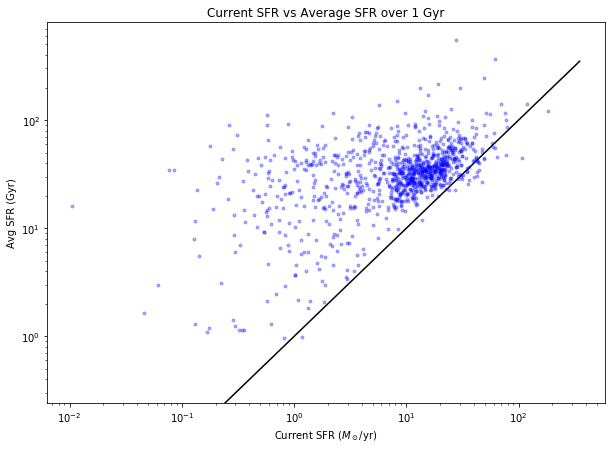

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#plot for Current SFR vs Avg SFR over 1 Gyr
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.plot(np.linspace(0, 350, 1000), np.linspace(0, 350, 1000), 'k-')
plt.plot(current_SFR, average_SFR_1, 'bo', ms=3, alpha=0.3)
plt.title('Current SFR vs Average SFR over 1 Gyr')
plt.xlabel('Current SFR ($M_\odot$/yr)')
plt.ylabel('Avg SFR (Gyr)')
plt.xscale('log')
plt.yscale('log')

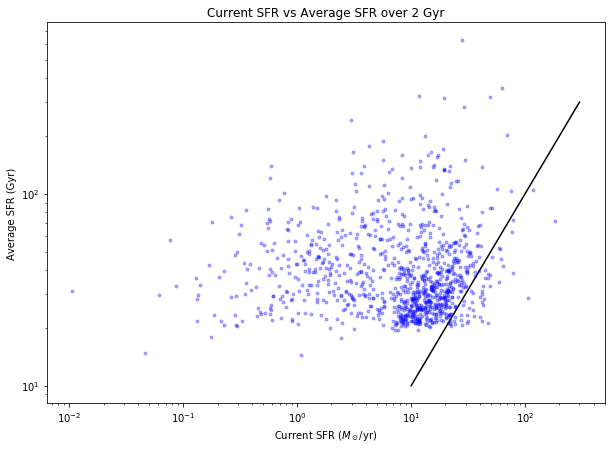

In [8]:

#plot for Current SFR vs Avg SFR over 2 Gyr
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.plot(np.linspace(10, 300, 1000), np.linspace(10, 300, 1000), 'k-')
plt.plot(current_SFR, average_SFR_2, 'bo', ms=3, alpha=0.3)
plt.title('Current SFR vs Average SFR over 2 Gyr')
plt.xlabel('Current SFR ($M_\odot$/yr)')
plt.ylabel('Average SFR (Gyr)')
plt.xscale('log')
plt.yscale('log')


Text(0, 0.5, 'galaxy count')

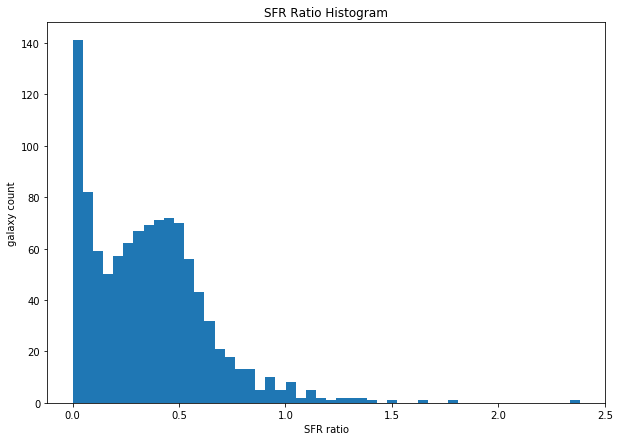

In [9]:
#histogram for Current SFR vs Avg SFR over 1 Gyr
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.hist(SFR_ratio, bins=50, histtype='bar')
plt.title('SFR Ratio Histogram')
plt.xlabel('SFR ratio')
plt.ylabel('galaxy count')
#unsure how to plot log of SFR_ratio, since some values are == 0

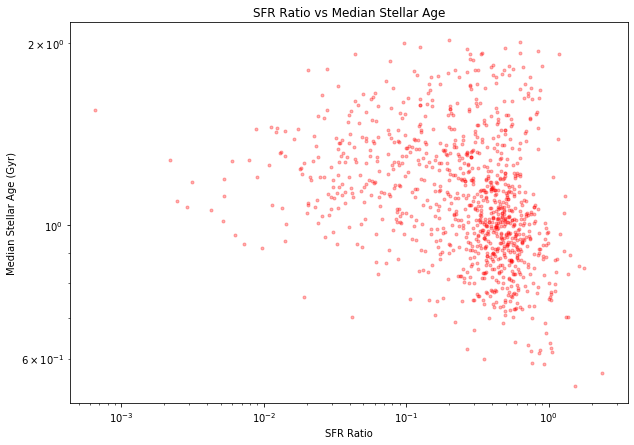

In [10]:
#plot for SFR ratio vs median stellar age
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.plot(SFR_ratio, median_age, 'ro', ms=3, alpha=0.3)
plt.title('SFR Ratio vs Median Stellar Age')
plt.xlabel('SFR Ratio')
plt.ylabel('Median Stellar Age (Gyr)')
plt.xscale('log')
plt.yscale('log')

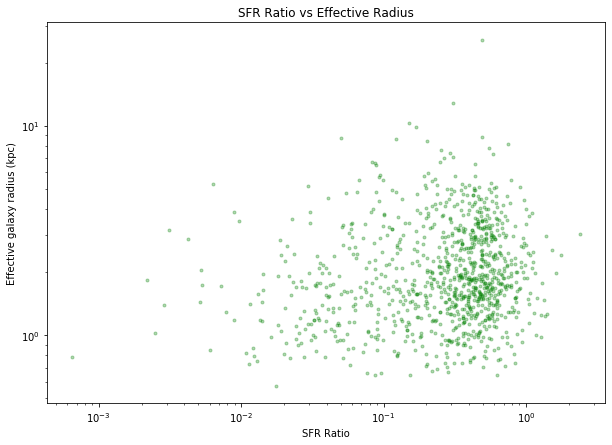

In [11]:
#plot for SFR ratio vs effective galaxy radius
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.plot(SFR_ratio, effective_radius, 'go', ms=3, alpha=0.3)
plt.title('SFR Ratio vs Effective Radius')
plt.xlabel('SFR Ratio')
plt.ylabel('Effective galaxy radius (kpc)')
plt.xscale('log')
plt.yscale('log')

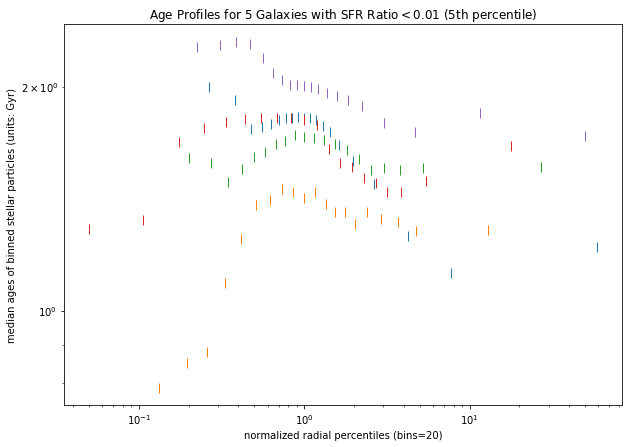

In [12]:
plt.figure(figsize=(10,7))
for id in low_ratio:
    plt.plot(age_profile(id=id, redshift=2)[1], age_profile(id=id, redshift=2)[0], '|', ms=10)
plt.title('Age Profiles for 5 Galaxies with SFR Ratio$<0.01$ (5th percentile)')
plt.xlabel('normalized radial percentiles (bins=20)')
plt.ylabel('median ages of binned stellar particles (units: Gyr)')
plt.xscale('log')
plt.yscale('log')

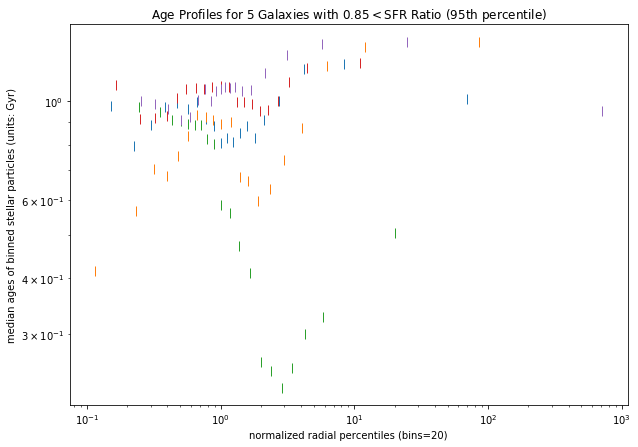

In [13]:
plt.figure(figsize=(10,7))
for id in high_ratio:
    plt.plot(age_profile(id=id, redshift=2)[1], age_profile(id=id, redshift=2)[0], '|', ms=10)
plt.title('Age Profiles for 5 Galaxies with $0.85<$SFR Ratio (95th percentile)')
plt.xlabel('normalized radial percentiles (bins=20)')
plt.ylabel('median ages of binned stellar particles (units: Gyr)')
plt.xscale('log')
plt.yscale('log')